In [ ]:
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from pathlib import Path
from ipywidgets import interact
from IPython.display import display
import pickle

plt.rcParams["figure.figsize"] = (15,6)

In [ ]:
!pwd

/content


In [ ]:
# # run only with jupyter notebook browser

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))

# if module_path not in sys.path:
#     sys.path.append(module_path)

In [ ]:
# from utilities.config import *
# from utilities.paths import *
# from utilities.utils import *

In [ ]:
model_name = "MNIST"
stage = 'train'

In [ ]:
df = pd.read_csv(f'{model_name}_{stage}.csv')

In [ ]:
cls = 1

df_cls = df.loc[ df['y'] == cls ].copy()

In [ ]:
df_cls.shape

(6052, 31)

In [ ]:
y = df_cls['y']
df_cls.drop('y', axis=1, inplace=True)

df_cls = pd.DataFrame( StandardScaler().fit_transform(df_cls), columns=df_cls.columns)

In [ ]:
df_cls.std(axis=0)

x0     1.000083
x1     1.000083
x2     1.000083
x3     1.000083
x4     1.000083
x5     1.000083
x6     1.000083
x7     1.000083
x8     1.000083
x9     1.000083
x10    1.000083
x11    1.000083
x12    1.000083
x13    1.000083
x14    1.000083
x15    1.000083
x16    1.000083
x17    1.000083
x18    1.000083
x19    1.000083
x20    1.000083
x21    1.000083
x22    1.000083
x23    1.000083
x24    1.000083
x25    1.000083
x26    1.000083
x27    1.000083
x28    1.000083
x29    1.000083
dtype: float64

In [ ]:
pca_cls = PCA(n_components=df_cls.shape[1])
df_cls_pca = pd.DataFrame( pca_cls.fit_transform(df_cls), columns=[f'PC_{i}' for i in range(pca_cls.n_components)] )

In [ ]:
df_cls_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29
0,-0.952837,-0.072118,0.886602,0.366659,0.120234,-0.934170,-0.546295,0.501748,0.326226,0.614663,...,-1.540149,-0.617586,0.015503,-0.001990,0.196438,0.335852,-0.351919,-0.499131,0.305549,0.052700
1,-1.017458,-0.300152,0.055696,-1.379973,-1.253823,-0.077692,1.102808,-0.071444,0.032116,-0.698878,...,-0.189589,-1.305698,1.330416,0.998887,0.273332,-0.169665,0.201878,-0.122271,0.146359,-0.253271
2,6.296028,-8.123717,-6.587022,2.666740,-3.137789,1.554350,-0.069866,1.557548,-2.339370,-1.410316,...,-1.263935,0.132441,2.298354,0.744925,-0.241889,-0.021155,0.727550,0.343560,-3.346964,1.342682
3,-0.888597,-0.210467,-0.423290,-0.129849,0.346718,0.449199,-0.538967,0.538630,0.023086,1.344424,...,0.166529,-0.035874,0.000511,-0.078576,0.040226,-0.287817,0.581082,0.205772,-0.009467,-0.065180
4,0.565945,-0.294535,1.729904,1.248532,-0.376980,-1.516401,0.701987,-0.439406,-1.048720,0.432902,...,1.014804,0.034501,-0.584353,-0.466903,-0.656497,-0.280319,-0.298976,-0.406347,0.047609,-0.191526


Analysis

In [ ]:
var_df = pd.DataFrame({
    'x': [f'x{i}' for i in range(pca_cls.n_components)],
    'variance':pca_cls.explained_variance_,
    'variance_ratio':pca_cls.explained_variance_ratio_ * 100,
    'cum_variance': np.cumsum(pca_cls.explained_variance_ratio_ * 100),
    'singular_values': pca_cls.singular_values_
}).round(2)

var_df

,x,variance,variance_ratio,cum_variance,singular_values
0,x0,7.06,23.53,23.53,206.69
1,x1,3.03,10.08,33.61,135.31
2,x2,2.59,8.62,42.23,125.12
3,x3,1.79,5.98,48.22,104.21
4,x4,1.71,5.70,53.91,101.71
5,x5,1.32,4.40,58.31,89.36
6,x6,1.05,3.51,61.83,79.86
7,x7,1.01,3.36,65.18,78.08
8,x8,0.92,3.05,68.24,74.47
9,x9,0.89,2.96,71.19,73.27


In [ ]:
def num_component_fn(v_thld=90.0):
    return var_df[ var_df['cum_variance'] <= v_thld ].shape[0]

v_thld_val = interact(num_component_fn, v_thld=(0,100.05,0.05) )

interactive(children=(FloatSlider(value=90.0, description='v_thld', max=100.05, step=0.05), Output()), _dom_cl…

In [ ]:
num_component = num_component_fn(v_thld_val.widget.kwargs['v_thld']) + 1

In [ ]:
pca_component = pd.DataFrame( pca_cls.components_[:,:num_component],
                            columns=[f'PC_{i}' for i in range(num_component)],
                            index=[f'x{i}' for i in range(pca_cls.n_components)])

pca_component[:2]

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19
x0,0.206922,-0.271093,-0.207859,0.145076,0.172830,0.147751,0.163816,-0.28895,0.134279,0.197941,0.223567,0.200816,0.060496,-0.125441,0.196387,0.036553,0.194432,0.210046,0.127729,0.192761
x1,-0.246339,-0.158798,-0.149380,0.324630,0.245723,0.146238,-0.068751,0.03651,0.132522,0.354544,-0.039180,-0.008757,0.152133,-0.018965,-0.348440,0.082650,-0.033103,0.112268,0.012091,-0.059896


In [ ]:
pca_component.shape

(30, 20)

In [ ]:
pca_cls_loading = pca_component.multiply( np.sqrt(pca_cls.explained_variance_) , axis=0)

In [ ]:
pca_cls_loading[:2]

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19
x0,0.549803,-0.720308,-0.552291,0.385473,0.459218,0.392581,0.435268,-0.767753,0.356785,0.525939,0.594028,0.533579,0.160741,-0.333304,0.521809,0.097123,0.516615,0.558103,0.339383,0.512177
x1,-0.428484,-0.276214,-0.259832,0.564663,0.427412,0.254368,-0.119586,0.063506,0.230510,0.616697,-0.068151,-0.015232,0.264621,-0.032989,-0.606079,0.143763,-0.057580,0.195279,0.021030,-0.104183


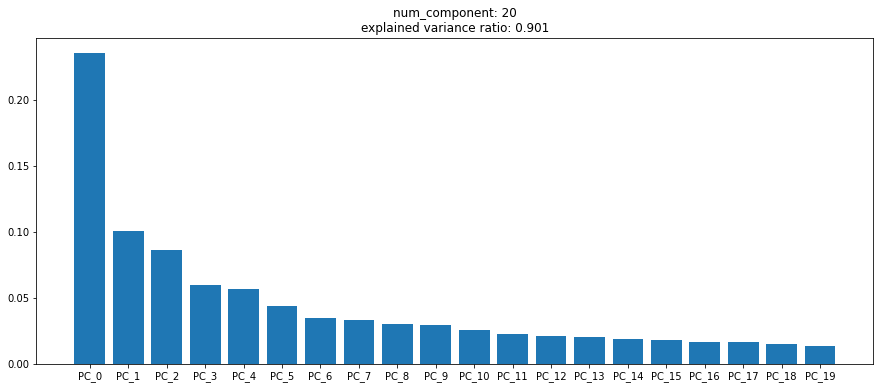

In [ ]:
plt.bar(pca_cls_loading.columns, pca_cls.explained_variance_ratio_[:num_component])
plt.xticks(pca_cls_loading.columns)
plt.title(f'''num_component: {num_component}
explained variance ratio: {pca_cls.explained_variance_ratio_[:num_component].sum().round(3)}''')
plt.show()

In [ ]:
def make_bar(col='PC_0'):
    plt.bar(pca_cls_loading.index, pca_cls_loading[col])
    plt.yticks(np.arange(-1,1.1, 0.1))
    plt.xticks(pca_cls_loading.index)
    plt.grid(axis='y')
    plt.title(f'neurons correlation against {col}')
    
display( 
    interact(
        make_bar,
        col=pca_cls_loading.columns
    )
)

interactive(children=(Dropdown(description='col', options=('PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC…

<function __main__.make_bar(col='PC_0')>

#Only Loadings

In [ ]:
loadings_thld = 0.2

neurons_loadings = (pca_cls_loading.abs() >= loadings_thld).sum(axis=1) / num_component
neurons_loadings

x0     0.90
x1     0.50
x2     0.65
x3     0.40
x4     0.35
x5     0.25
x6     0.15
x7     0.40
x8     0.15
x9     0.15
x10    0.20
x11    0.15
x12    0.15
x13    0.15
x14    0.05
x15    0.20
x16    0.10
x17    0.20
x18    0.10
x19    0.10
x20    0.05
x21    0.10
x22    0.15
x23    0.10
x24    0.00
x25    0.00
x26    0.10
x27    0.05
x28    0.05
x29    0.05
dtype: float64

Text(0.5, 1.0, 'number of neurons selected 10')

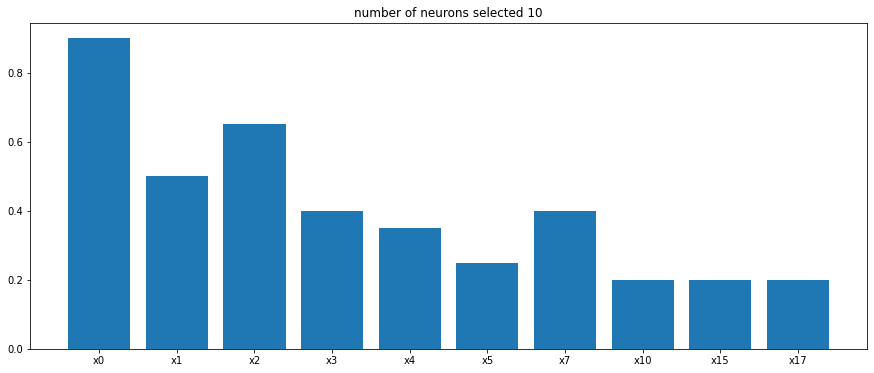

In [ ]:
neurons_loadings_thld = neurons_loadings[ neurons_loadings >= loadings_thld ]

plt.bar(neurons_loadings_thld.index, neurons_loadings_thld)
plt.title(f'number of neurons selected {neurons_loadings_thld.shape[0]}')

#Loadings and Variance Ratio

In [ ]:
def sofmax_(arr):
    exp_ = np.exp( arr )
    return exp_ / np.sum(exp_)

In [ ]:
# neurons_loadings_var = sofmax_(neurons_loadings * pca_cls.explained_variance_ratio_) * 100
neurons_loadings_var = neurons_loadings * pca_cls.explained_variance_ratio_
neurons_loadings_var

x0     0.211762
x1     0.050417
x2     0.056045
x3     0.023926
x4     0.019943
x5     0.010994
x6     0.005270
x7     0.013432
x8     0.004582
x9     0.004435
x10    0.005070
x11    0.003412
x12    0.003147
x13    0.003112
x14    0.000941
x15    0.003670
x16    0.001674
x17    0.003265
x18    0.001528
x19    0.001387
x20    0.000690
x21    0.001283
x22    0.001760
x23    0.001099
x24    0.000000
x25    0.000000
x26    0.000854
x27    0.000382
x28    0.000346
x29    0.000310
dtype: float64

Text(0.5, 1.0, 'number of neurons selected 3')

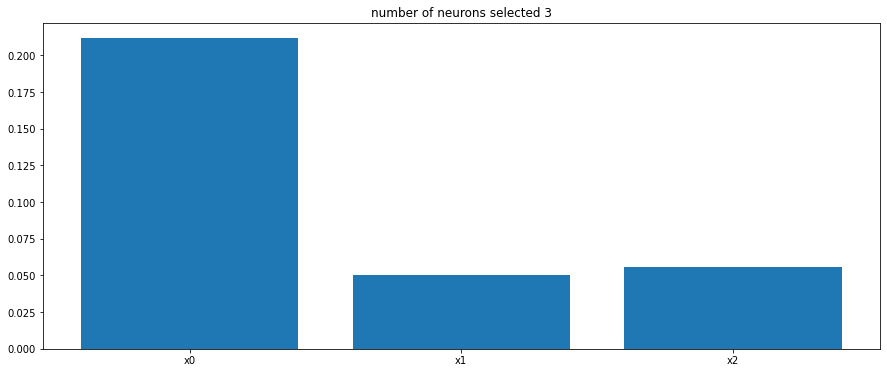

In [ ]:
loadings_var_thld = 0.2 * 0.2

neurons_loadings_var_thld = neurons_loadings_var[ neurons_loadings_var >= loadings_var_thld]


plt.bar(neurons_loadings_var_thld.index, neurons_loadings_var_thld)
plt.title(f'number of neurons selected {neurons_loadings_var_thld.shape[0]}')

#Loadings and Weights

In [ ]:
df_weights_cls = pd.DataFrame()

temp = df.loc[ df['y'] == cls ].copy()

for c in df_cls.columns:
    df_weights_cls[c] = np.where( temp[c].values > 0, 1, 0)

del temp

df_weights_cls['y'] = y

neuron_calss_balance = df_weights_cls.groupby('y')['y'].count()

df_neurons_weights_cls_counts = df_weights_cls.groupby('y').sum().T
# df_neurons_weights_cls_counts

In [ ]:
df_neuron_weights_cls = df_neurons_weights_cls_counts.copy()
df_neuron_weights_cls[cls] = df_neuron_weights_cls[cls] / neuron_calss_balance.values[0]

# df_neuron_weights_cls

In [ ]:
df_neuron_weights_cls.median()

y
1.0    0.140118
dtype: float64

In [ ]:
df_neuron_weights_cls.describe().T[['std', 'min', 'max']]

,std,min,max
y,,,
1.0,0.360527,0.036873,0.998525


In [ ]:
# pd.DataFrame({
#     "activation_counts": df_neurons_weights_cls_counts[cls],
#     "activation_ratio": df_neuron_weights_cls[cls]
# }).sort_values('activation_ratio', ascending=False)

df_neuron_weights_cls = df_neuron_weights_cls[cls]

In [ ]:
neurons_loadings_weights = neurons_loadings * df_neuron_weights_cls
neurons_loadings_weights

x0     0.070354
x1     0.499263
x2     0.649041
x3     0.086726
x4     0.032522
x5     0.073746
x6     0.010177
x7     0.398820
x8     0.023009
x9     0.020354
x10    0.023009
x11    0.015044
x12    0.098451
x13    0.149115
x14    0.008186
x15    0.189676
x16    0.019322
x17    0.019469
x18    0.009587
x19    0.014307
x20    0.005826
x21    0.099853
x22    0.005531
x23    0.006490
x24    0.000000
x25    0.000000
x26    0.005162
x27    0.023673
x28    0.002286
x29    0.007743
dtype: float64

Text(0.5, 1.0, 'number of neurons selected 10')

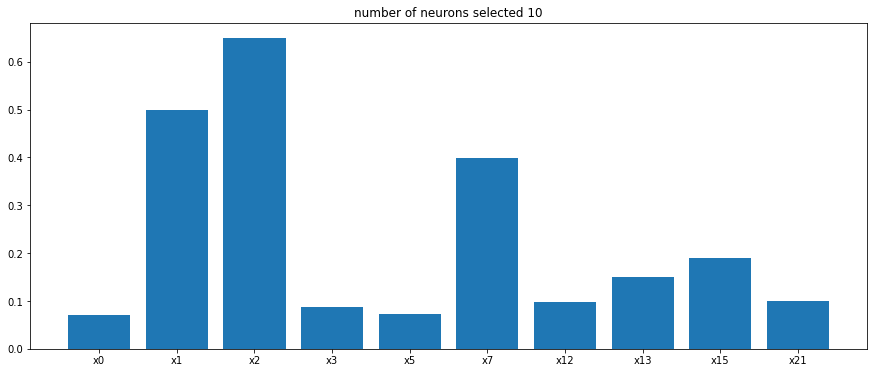

In [ ]:
loadings_weights_thld = 0.2 * 0.25

neurons_loadings_weights_thld = neurons_loadings_weights[ neurons_loadings_weights >= loadings_weights_thld]


plt.bar(neurons_loadings_weights_thld.index, neurons_loadings_weights_thld)
plt.title(f'number of neurons selected {neurons_loadings_weights_thld.shape[0]}')

In [ ]:
# are the loadings and loadings_weights neurons the same?
set(neurons_loadings_thld.index) | set(neurons_loadings_weights_thld.index)

{'x0',
 'x1',
 'x10',
 'x12',
 'x13',
 'x15',
 'x17',
 'x2',
 'x21',
 'x3',
 'x4',
 'x5',
 'x7'}

#Loadings, Variance Ratio, and Weights

In [ ]:
loadings_var_weights_thld = 0.2 * 0.2 * 0.25

neurons_loadings_var_weights = neurons_loadings_weights * pca_cls.explained_variance_ratio_

In [ ]:
neurons_loadings_var_weights_thld = neurons_loadings_var_weights[ neurons_loadings_var_weights >= loadings_var_weights_thld ]

Text(0.5, 1.0, 'number of neurons selected 4')

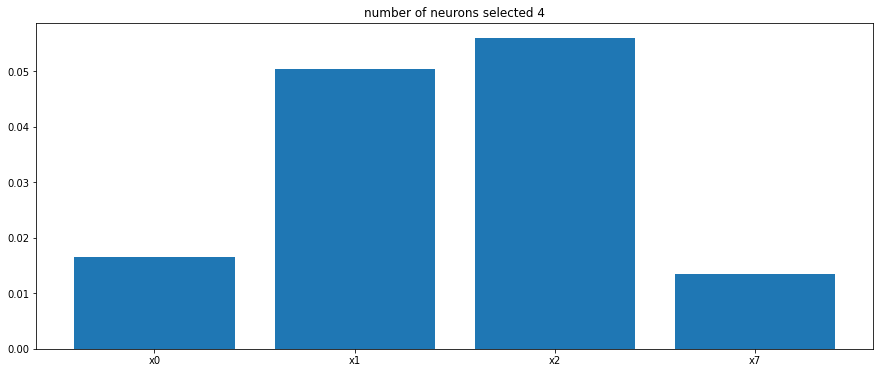

In [ ]:
plt.bar(neurons_loadings_var_weights_thld.index, neurons_loadings_var_weights_thld)
plt.title(f'number of neurons selected {neurons_loadings_var_weights_thld.shape[0]}')